ETL

En esta etapa se trabajará con los dataframes obtenidos luego de la etapa de ETL. Se cuenta con 3 dataframes:

df_combinado.csv

df_agrupado.csv

df_nacional.csv

df_partidos.csv

Se instalan las librerias que se usarán en este proceso

In [2]:
!pip install geopandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ivan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [60]:
# Descargar librerias necesarias para manipulación de datos 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from scipy.stats import pearsonr
from scipy.stats import ttest_ind

from sklearn.decomposition import PCA

Dataframe df_agrupados

El DataFrame "df_agrupados" contiene información sobre las conexiones de Internet en diferentes provincias a lo largo de varios años y trimestres. A continuación se muestra una descripción de las columnas del DataFrame:

Año: El año correspondiente a los datos de la fila.

Trimestre: El trimestre correspondiente a los datos de la fila.

Provincia: El nombre de la provincia para la cual se proporcionan los datos.

ADSL: Número de conexiones de tipo ADSL en la provincia para el año y trimestre específicos.

Cablemodem: Número de conexiones de tipo Cablemodem en la provincia para el año y trimestre específicos.

Fibra óptica: Número de conexiones de tipo Fibra óptica en la provincia para el año y trimestre específicos.

Wireless: Número de conexiones de tipo Wireless en la provincia para el año y trimestre específicos.

Otros: Número de conexiones de otros tipos en la provincia para el año y trimestre específicos.

Total_conexion: Total de conexiones de Internet en la provincia para el año y trimestre específicos.

Accesos por cada 100 hab: Número de accesos a Internet por cada 100 habitantes en la provincia para el año y trimestre específicos.

Accesos por cada 100 hogares: Número de accesos a Internet por cada 100 hogares en la provincia para el año y trimestre específicos.

Banda ancha fija: Número de conexiones de banda ancha fija en la provincia para el año y trimestre específicos.

Dial up: Número de conexiones de tipo Dial up en la provincia para el año y trimestre específicos.

Hasta 512 kbps: Número de conexiones con velocidad hasta 512 kbps en la provincia para el año y trimestre específicos.

512 Kbps - 1 Mbps: Número de conexiones con velocidad entre 512 Kbps y 1 Mbps en la provincia para el año y trimestre específicos.

1 Mbps - 6 Mbps: Número de conexiones con velocidad entre 1 Mbps y 6 Mbps en la provincia para el año y trimestre específicos.

6 Mbps - 10 Mbps: Número de conexiones con velocidad entre 6 Mbps y 10 Mbps en la provincia para el año y trimestre específicos.

10 Mbps - 20 Mbps: Número de conexiones con velocidad entre 10 Mbps y 20 Mbps en la provincia para el año y trimestre específicos.

20 Mbps - 30 Mbps: Número de conexiones con velocidad entre 20 Mbps y 30 Mbps en la provincia para el año y trimestre específicos.

30 Mbps: Número de conexiones con velocidad superior a 30 Mbps en la provincia para el año y trimestre específicos.

Otros Mbps: Número de conexiones con velocidad de otros tipos en la provincia para el año y trimestre específicos.

Total suma Mbps: Total de la suma de todas las conexiones de Internet por velocidad en la provincia para el año y trimestre específicos.

In [61]:
# Carga del archivo:
df_combinado = pd.read_csv(r"df_combinados.csv")
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   año                           1856 non-null   int64  
 1   trimestre                     1856 non-null   int64  
 2   provincia                     1856 non-null   object 
 3   banda ancha fija              1856 non-null   object 
 4   dial up                       1852 non-null   float64
 5   total_conexion                1856 non-null   object 
 6   accesos por cada 100 hogares  1854 non-null   object 
 7   accesos por cada 100 hab      1854 non-null   object 
 8   adsl                          1854 non-null   object 
 9   cablemodem                    1854 non-null   object 
 10  fibra óptica                  1854 non-null   object 
 11  wireless                      1854 non-null   float64
 12  otros Mbps                    1854 non-null   float64
 13  has

In [66]:
# Visualizamos algunos datos del df
df_combinado.sample(13)

,año,trimestre,provincia,banda ancha fija,dial up,total_conexion,accesos por cada 100 hogares,accesos por cada 100 hab,adsl,cablemodem,...,otros Mbps,hasta 512 kbps,+ 512 kbps - 1 mbps,+ 1 mbps - 6 mbps,+ 6 mbps - 10 mbps,+ 10 mbps - 20 mbps,+ 20 mbps - 30 mbps,+ 30 mbps,otros,total suma Mbps
972,2019,1,Neuquén,112.321,2.056,114.377,"58,88","17,53",40.747,55.634,...,2.372,1.328,3.055,52.360,1.781,21.452,17.135,11.026,6.105,114.242
1414,2021,2,Santa Cruz,48.785,197.000,48.982,"44,01","13,10",12.347,22.967,...,3.071,50.000,0.000,30.595,8.463,6.888,1.575,676,735.000,48.982
1100,2019,4,Córdoba,806.633,55.000,806.688,"70,48","21,58",296.872,410.038,...,8.693,142.000,0.000,232.781,118.232,109.330,114.111,221.742,10.350,806.688
742,2017,4,Santa Cruz,29.018,434.000,29.452,"28,91","8,60",18.614,1.668,...,3.950,68.000,78.000,29.073,655.000,100.000,1.000,3,0.000,29.978
1574,2022,3,Río Negro,160.010,548.000,160.558,"67,98","20,91",35.552,48.260,...,18.969,111.000,1.221,32.936,17.860,27.934,13.629,42.596,24.271,160.558
1134,2019,4,Tucumán,198.621,23.000,198.644,"47,65","11,80",146.985,11.012,...,348.000,55.000,0.000,54.544,52.017,28.916,6.405,56.707,0.000,198.644
702,2017,3,Tucumán,160.979,33.000,161.012,"39,70","9,83",154.130,6.431,...,305.000,109.000,8.948,83.070,45.302,20.514,1.361,655,0.000,159.959
1451,2021,3,Misiones,158.528,0.000,158.528,"45,57","12,41",43.230,89.469,...,7.662,51.000,5.000,41.932,25.099,26.079,14.792,42.291,8.279,158.528
1408,2021,2,Salta,191.637,2.000,191.639,"54,93","13,30",51.396,96.016,...,6.453,101.000,20.000,42.543,67.012,7.099,9.654,58.882,6.328,191.639
1780,2023,3,Tierra Del Fuego,58.426,305.000,58.731,"105,95","31,41",9.357,45.203,...,332.000,22.000,834.000,10.550,12.731,20.384,5.150,4.040,5.020,58.731


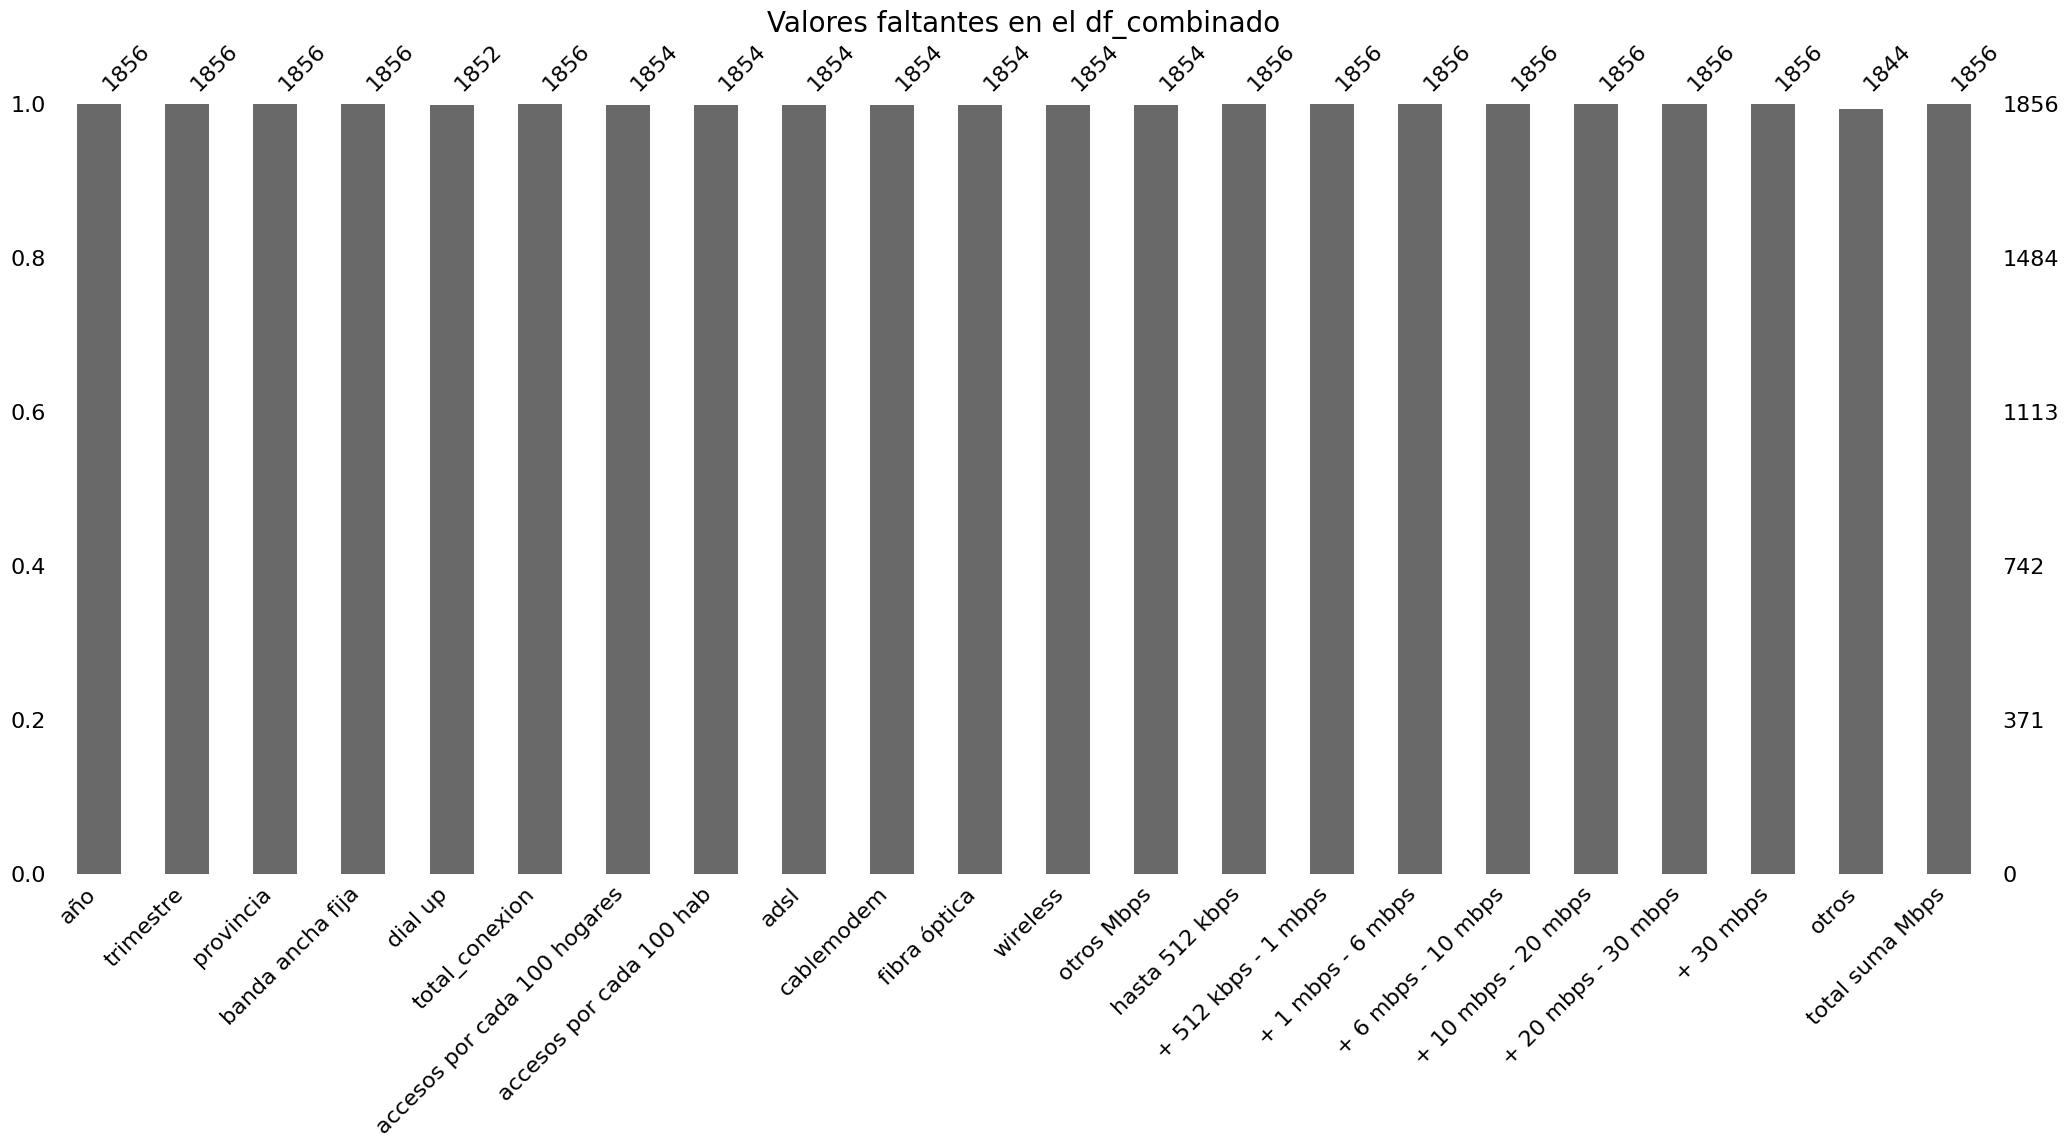

In [63]:
# Revisamos los valores faltantes del df
msno.bar(df_combinado)
plt.title('Valores faltantes en el df_combinado', fontsize=20) 
plt.show() # en este caso vemos que todas las columnas contienen la misma cantidad de datos


Analisis univariado
Se comienza con el análisis de las variables:

adsl: (Asymmetric Digital Subscriber Line) es una tecnología de transmisión de datos de banda ancha a través de líneas telefónicas de cobre. Permite una mayor velocidad de descarga en comparación con la velocidad de carga.

Cablemodem: se refiere a la conexión de banda ancha a través de la red de televisión por cable. Usa la infraestructura de cables coaxiales existente para transmitir datos de alta velocidad.

Fibra óptica: es un medio de transmisión de datos que utiliza cables hechos de hilos de vidrio o plástico muy finos. Proporciona una velocidad de conexión muy alta y una menor atenuación de la señal en comparación con otras tecnologías.

Wireless: son las conexiones de banda ancha inalámbricas, donde los dispositivos se conectan a través de señales de radio o redes de área local inalámbricas (WLAN) como Wi-Fi.

Otros: esta categoría incluye conexiones de banda ancha que no se clasifican en las categorías anteriores. Puede incluir tecnologías emergentes o menos comunes de acceso a Internet de alta velocidad.

Estas tecnologías representan diferentes formas de acceso a Internet de banda ancha que ofrecen velocidades más rápidas y mejor rendimiento en comparación con las conexiones de acceso telefónico tradicionales.


In [64]:
# Se visualizan los estadísticos de las columnas de los tipos de conexión
columnas = ['adsl', 'cablemodem', 'fibra óptica', 'wireless', 'otros']
df_estadisticos = df_combinado[columnas].describe()
print(df_estadisticos)

          wireless        otros
count  1854.000000  1844.000000
mean     54.361220    39.628909
std     146.384153   145.342073
min       0.000000    -1.945000
25%       3.914000     0.000000
50%      10.782500     1.035000
75%      26.967750     9.256000
max     952.000000   999.000000


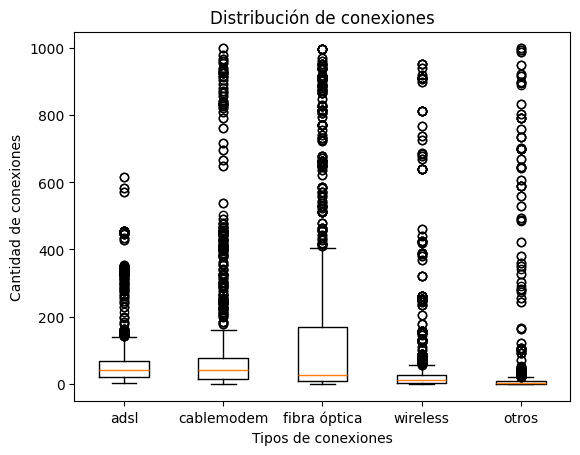

In [67]:
df_combinado.columns = df_combinado.columns.str.strip()

columnas = ['adsl', 'cablemodem', 'fibra óptica', 'wireless', 'otros']
columnas_normalizadas = [col.lower() for col in columnas]
# Ahora proceder con la eliminación de filas nulas
df_combinado.dropna(subset=columnas_normalizadas, inplace=True)
# Y luego convertir las columnas a numéricas
df_combinado[columnas_normalizadas] = df_combinado[columnas_normalizadas].apply(pd.to_numeric, errors='coerce')
df_combinado[columnas_normalizadas] = df_combinado[columnas_normalizadas].apply(pd.to_numeric, errors='coerce')

# Crear el gráfico boxplot
plt.boxplot(df_combinado[columnas_normalizadas])
plt.ylabel('Cantidad de conexiones')
plt.xlabel('Tipos de conexiones')
plt.title('Distribución de conexiones')
plt.xticks(range(1, len(columnas_normalizadas) + 1), columnas_normalizadas)
plt.show()

Vemos que hay una mayor dispersión de datos en cablemodem, seguida de fibra óptica y otros.

Revision de las variables:

Año
Timestre
Provincia

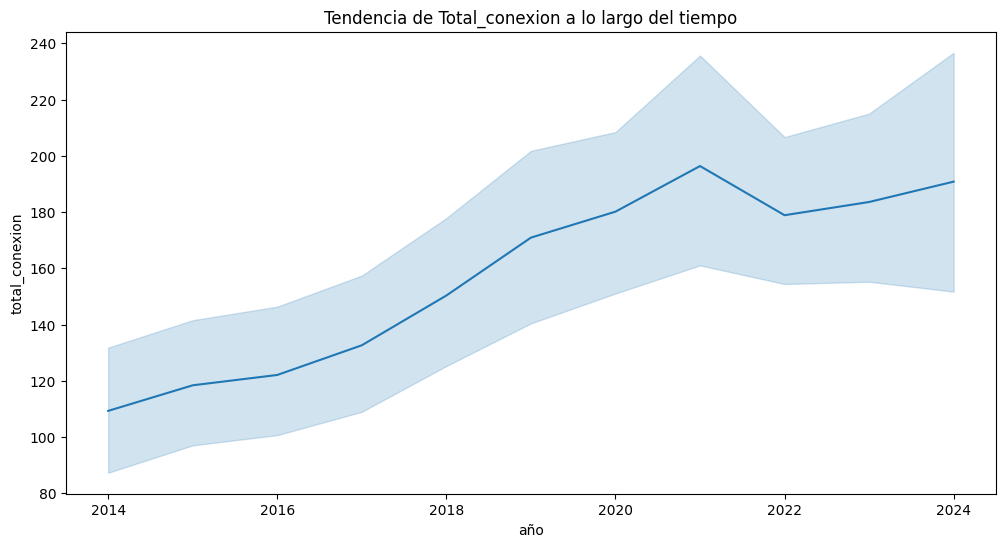

In [68]:
# Ordenar por año para asegurarse de que el gráfico es cronológico
df_combinado = df_combinado.sort_values(by='año')

# Eliminar filas con valores nulos en 'año' o 'total_conexion'
df_combinado.dropna(subset=['año', 'total_conexion'], inplace=True)

# Asegurarse de que 'año' y 'total_conexion' sean numéricos
df_combinado['año'] = pd.to_numeric(df_combinado['año'], errors='coerce')
df_combinado['total_conexion'] = pd.to_numeric(df_combinado['total_conexion'], errors='coerce')

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_combinado, x='año', y='total_conexion')
plt.title('Tendencia de Total_conexion a lo largo del tiempo')
plt.show()


vemos un notable incremento de las conexiones a lo largo de los años, en los registros

In [69]:
# Revisamos los datos de "Año", "Trimestre" y "Provincia"
cuenta_años = df_combinado['año'].value_counts()
cuenta_trimestre = df_combinado['trimestre'].value_counts()
cuenta_provincia = df_combinado['provincia'].value_counts()

print("Recuento de valores en la columna 'Año':")
print(cuenta_años)
print("\nRecuento de valores en la columna 'Trimestre':")
print(cuenta_trimestre)
print("\nRecuento de valores en la columna 'Provincia':")
print(cuenta_provincia)

Recuento de valores en la columna 'Año':
año
2015    184
2016    184
2017    184
2018    180
2020    176
2014    168
2019    166
2022    154
2021    132
2023    132
2024     66
Name: count, dtype: int64

Recuento de valores en la columna 'Trimestre':
trimestre
2    462
1    456
3    448
4    360
Name: count, dtype: int64

Recuento de valores en la columna 'Provincia':
provincia
Catamarca              78
Chaco                  78
Chubut                 78
Río Negro              78
Neuquén                78
Formosa                78
Corrientes             78
Jujuy                  78
Córdoba                78
Misiones               78
La Pampa               78
Entre Ríos             78
Salta                  76
San Luis               76
San Juan               76
Mendoza                76
Santa Fe               76
La Rioja               76
Santiago Del Estero    76
Santa Cruz             74
Tucumán                74
Tierra Del Fuego       74
Capital Federal        36
Name: count, dtype: i

El año 2024 tiene la menor cantidad de registros (66), y tambien hay menor cantidad de datos para el 4to trimestre (360).

Las variables:

Accesos por cada 100 hab: Número de accesos a Internet por cada 100 habitantes en la provincia para el año y trimestre específicos.

Accesos por cada 100 hogares: Número de accesos a Internet por cada 100 hogares en la provincia para el año y trimestre específicos.

In [ ]:
# Revision de las variables
print(df_combinado['accesos por cada 100 hab'].describe())
print(df_combinado['accesos por cada 100 hogares'].describe())

count       1724
unique       724
top       23,41 
freq           8
Name: accesos por cada 100 hab, dtype: object
count       1724
unique       820
top       32,49 
freq          10
Name: accesos por cada 100 hogares, dtype: object


Revision de las variables:

Banda ancha fija:Se refiere a conexiones a Internet de alta velocidad que tienen una capacidad de transmisión de datos mayor que las conexiones dial-up. Proporciona una mayor capacidad de carga y descarga de datos, lo que permite una experiencia de navegación y descarga más rápida.

Dial up:Con una conexión dial-up, se utiliza un módem para establecer una conexión a través de la red telefónica con un proveedor de servicios de Internet (ISP). La velocidad de conexión es baja en comparación con las tecnologías más modernas, y generalmente se limita a velocidades de transmisión de datos de hasta 56 kilobits por segundo (Kbps).

In [74]:
# Revision de las variables

# Convertir 'banda ancha fija' a tipo numérico
df_combinado['banda ancha fija'] = pd.to_numeric(df_combinado['banda ancha fija'], errors='coerce')

print(df_combinado['banda ancha fija'].describe())
print(df_combinado['dial up'].describe())


count    1674.000000
mean      153.211035
std       182.411940
min        12.683000
25%        52.245500
50%       100.329500
75%       160.010000
max       946.726000
Name: banda ancha fija, dtype: float64
count    1722.000000
mean      158.799286
std       233.463140
min         0.000000
25%         2.000000
50%        21.500000
75%       259.750000
max       998.000000
Name: dial up, dtype: float64


La variable "banda ancha fija" presenta una mayor dispersión y un valor promedio más alto en comparación con la variable "dial up" 

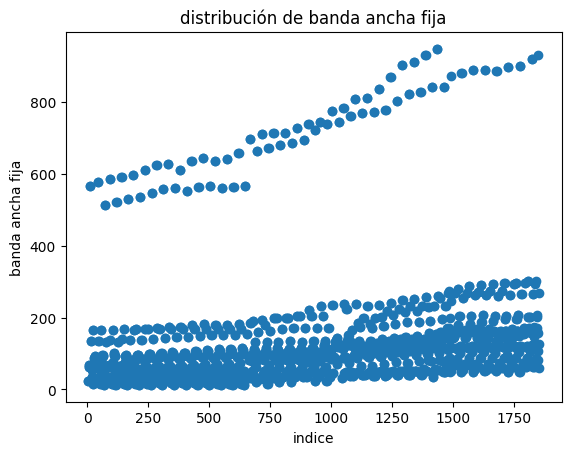

In [80]:
# De forma gráfica podemos notar la distribución de los datos: 
plt.plot(df_combinado['banda ancha fija'], 'o')
plt.xlabel('indice')
plt.ylabel('banda ancha fija')
plt.title('distribución de banda ancha fija')
plt.show()

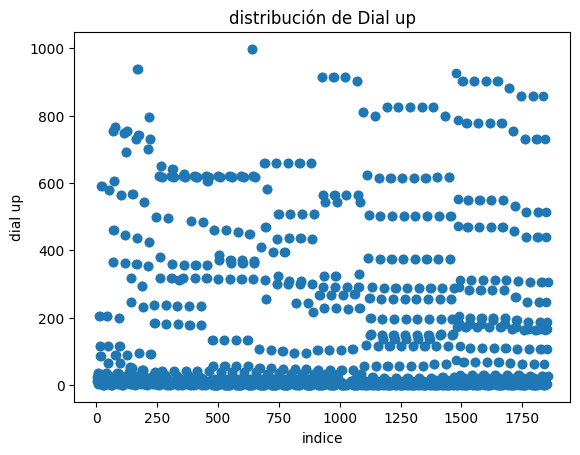

In [82]:
# De forma análoga con Dial up: 
plt.plot(df_combinado['dial up'], 'o')
plt.xlabel('indice')
plt.ylabel('dial up')
plt.title('distribución de Dial up')
plt.show()

Para las ultimas variables de este dataframe:

Hasta 512 kbps

512 Kbps - 1 Mbps

1 Mbps - 6 Mbps

6 Mbps - 10 Mbps

10 Mbps - 20 Mbps

20 Mbps - 30 Mbps

30 Mbps

Otros Mbps: Número de conexiones con velocidad de otros tipos en cada provincia.
Total suma Mbps: Total de la suma de todas las conexiones de Internet.

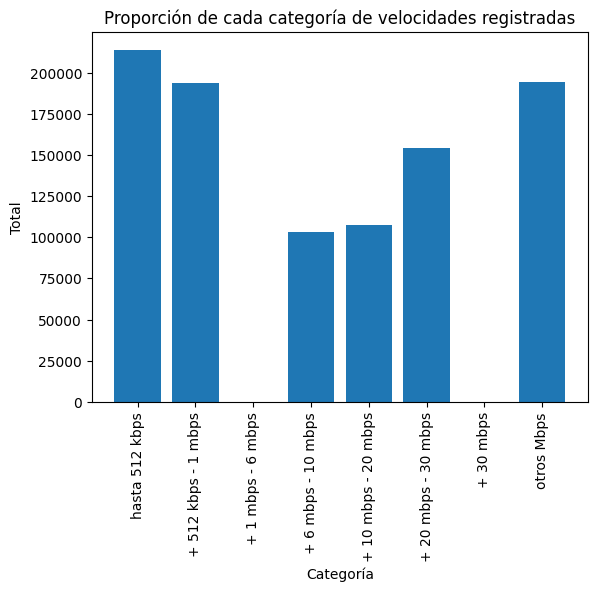

In [86]:
# De forma gráfica podemos ver la cantidad de cada velocidad registradas en el dataset
sizes = df_combinado[['hasta 512 kbps', '+ 512 kbps - 1 mbps', '+ 1 mbps - 6 mbps', '+ 6 mbps - 10 mbps',
                      '+ 10 mbps - 20 mbps', '+ 20 mbps - 30 mbps', '+ 30 mbps', 'otros Mbps']].sum()

labels = sizes.index
values = sizes.values

values = pd.to_numeric(sizes.values, errors='coerce')
labels = sizes.index.astype(str)


plt.bar(labels, values)
plt.xlabel('Categoría')
plt.ylabel('Total')
plt.title('Proporción de cada categoría de velocidades registradas')
plt.xticks(rotation=90)
plt.show()

En este caso la mayor cantidades de valores estan entre las velocidades de "hasta 512 Mbps", "+512 kbps - 1 mbps" y "otros mbps".

In [91]:
# De forma más profunda los análisis estadísticos de estas variables son:
estadistica_vel = df_combinado[['hasta 512 kbps', '+ 512 kbps - 1 mbps', '+ 1 mbps - 6 mbps', '+ 6 mbps - 10 mbps',
                           '+ 10 mbps - 20 mbps', '+ 20 mbps - 30 mbps', '+ 30 mbps', 'otros Mbps' ]].describe()
estadisticas_totales= pd.concat([estadistica_vel])
print(estadisticas_totales)

       hasta 512 kbps  + 512 kbps - 1 mbps  + 6 mbps - 10 mbps  \
count     1726.000000          1726.000000         1726.000000   
mean       123.857793           112.393641           59.978291   
std        180.256110           228.992116          132.598463   
min          1.007000             0.000000            0.000000   
25%         15.000000             3.014000            5.415000   
50%         57.000000             7.833000           18.318000   
75%        127.000000            84.000000           50.015000   
max        998.000000           999.000000          917.000000   

       + 10 mbps - 20 mbps  + 20 mbps - 30 mbps   otros Mbps  
count          1726.000000          1726.000000  1726.000000  
mean             62.338309            89.243494   112.418407  
std             152.366704           198.716873   221.994324  
min               0.000000             0.000000     1.007000  
25%               4.879500             2.124000     2.922000  
50%              13.250000 

En este caso se puede resaltar que el mínimo de varias variable es 0.000

Analisis bivariado - multivariado

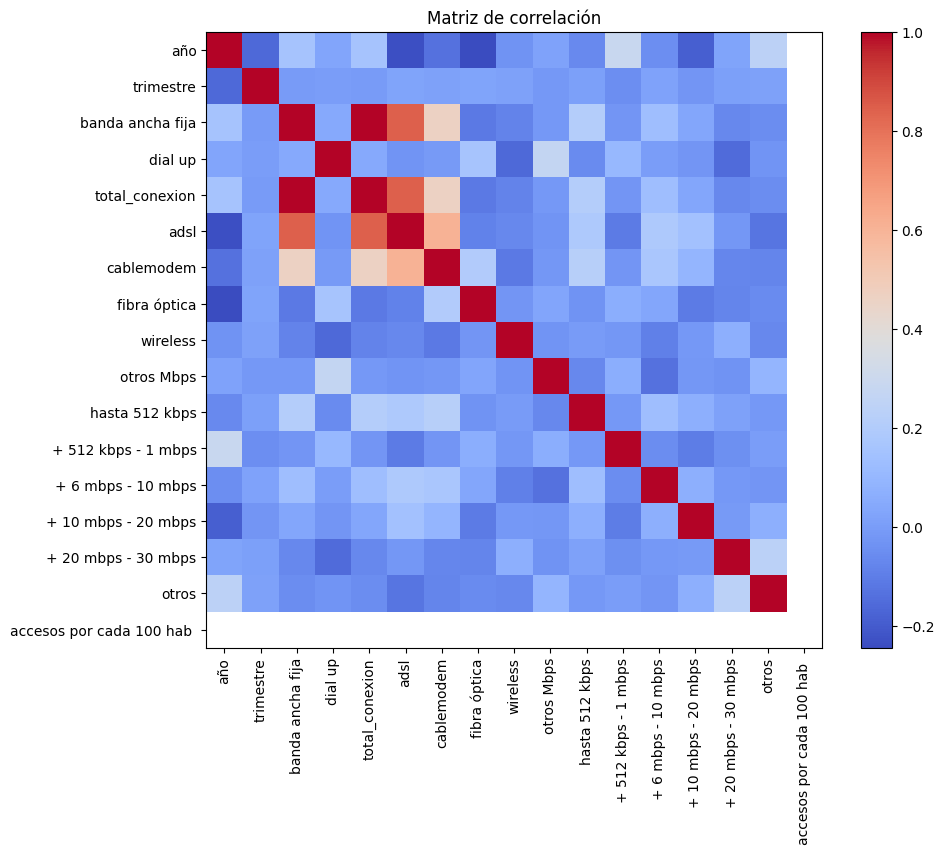

In [92]:
corr_matrix = df_combinado.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Matriz de correlación')
plt.show()

las correlaciones se agruparon como previamente fueron tratadas

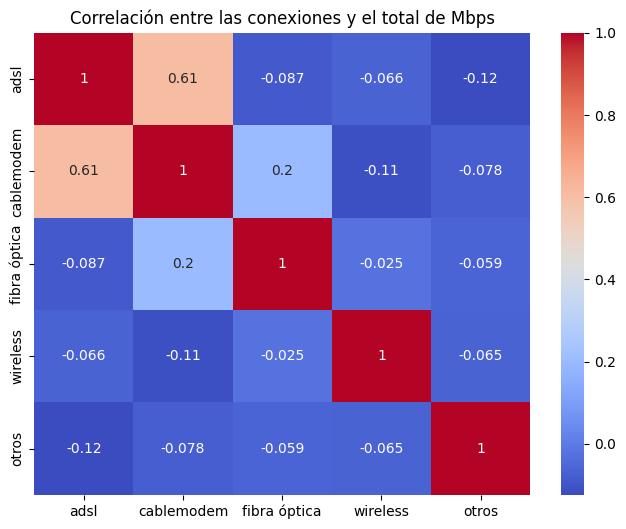

In [94]:
# Gráfico de correlación de las conexiones con el total de Mbps
conn_types = ['adsl', 'cablemodem', 'fibra óptica', 'wireless', 'otros']
df_corr = df_combinado[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre las conexiones y el total de Mbps')
plt.show()

In [97]:
# Otra forma de visualizar la correlacion de estas variables
variables = ['adsl', 'cablemodem', 'fibra óptica', 'wireless', 'otros']
correlation_matrix = np.corrcoef(df_combinado[variables].values.T)
correlation_pairs = []
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        coef = correlation_matrix[i, j]
        pair = (variables[i], variables[j], coef)
        correlation_pairs.append(pair)
sorted_pairs = sorted(correlation_pairs, key=lambda x: x[2], reverse=True)
for pair in sorted_pairs:
    var1, var2, coef = pair
    print(f"Correlación de Pearson entre {var1} y {var2}: {coef:.2f}")

Correlación de Pearson entre adsl y cablemodem: 0.61
Correlación de Pearson entre cablemodem y fibra óptica: 0.20
Correlación de Pearson entre fibra óptica y wireless: -0.03
Correlación de Pearson entre fibra óptica y otros: -0.06
Correlación de Pearson entre wireless y otros: -0.07
Correlación de Pearson entre adsl y wireless: -0.07
Correlación de Pearson entre cablemodem y otros: -0.08
Correlación de Pearson entre adsl y fibra óptica: -0.09
Correlación de Pearson entre cablemodem y wireless: -0.11
Correlación de Pearson entre adsl y otros: -0.12


Algunas formas de conexión presentan nuemeros elevados de coeficiente de correlacion de Pearson entre varias parejas de variables, como cablemodem y fibra óptica, Fibra óptica y Wireless, adsl y cablemodem, entre otros.

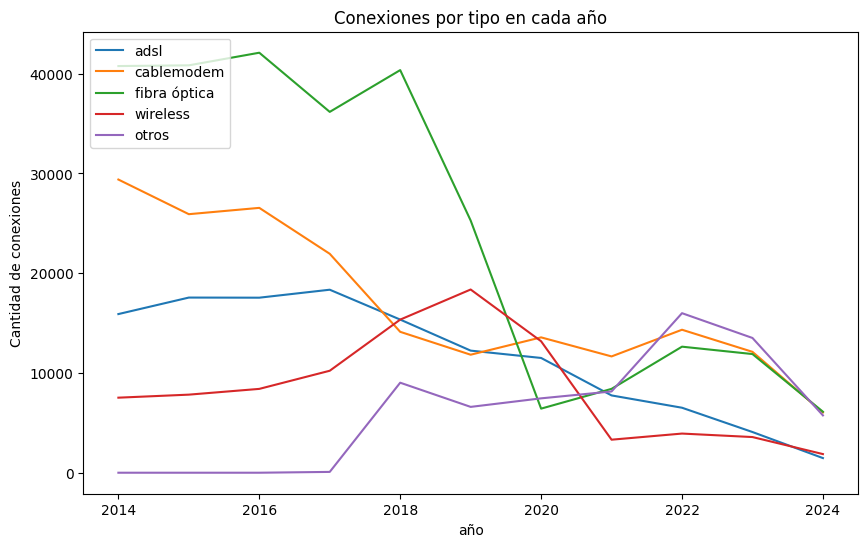

In [100]:
# Gráfico de líneas múltiples para comparar las conexiones por tipo en cada año
conn_types = ['adsl', 'cablemodem', 'fibra óptica', 'wireless', 'otros']
df_conn_types = df_combinado[conn_types].groupby(df_combinado['año']).sum()

plt.figure(figsize=(10, 6))
for conn_type in conn_types:
    plt.plot(df_conn_types.index, df_conn_types[conn_type], label=conn_type)

plt.title('Conexiones por tipo en cada año')
plt.xlabel('año')
plt.ylabel('Cantidad de conexiones')
plt.legend(loc='upper left')
plt.show()

Análisis de los valores registrados para el año anterior

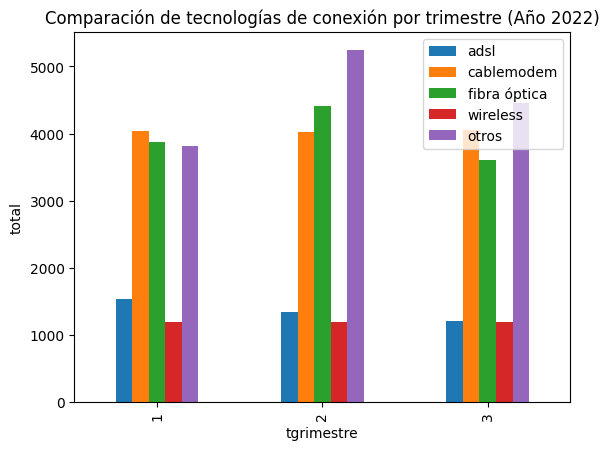

In [102]:
df_2023 = df_combinado[df_combinado['año'] == 2023]

df_grouped = df_2023.groupby('trimestre')[['adsl', 'cablemodem', 'fibra óptica', 'wireless', 'otros']].sum()
df_grouped.plot(kind='bar')
plt.xlabel('tgrimestre')
plt.ylabel('total')
plt.title('Comparación de tecnologías de conexión por trimestre (Año 2022)')
plt.show()

Notamos que hubo una mayor preponderancia de conexiones en el primer trimestre de "Cablemodem", seguida por las de "otros", pero en el segundo y el tercer trimestre prepondero "otros"

accesos por cada 100 hab         2
accesos por cada 100 hogares     2
total_conexion                  52
dtype: int64


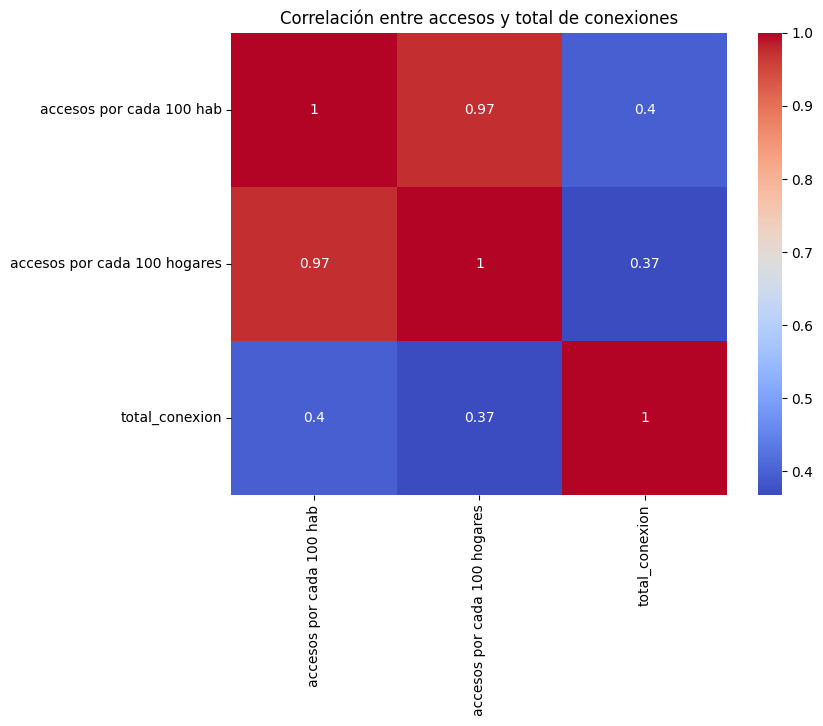

In [111]:
for col in conn_types:
    # Asegurar que todos los valores sean cadenas antes de aplicar .str
    df_combinado[col] = df_combinado[col].astype(str).str.replace(',', '.').str.strip()
    # Convertir a numérico después de limpiar
    df_combinado[col] = pd.to_numeric(df_combinado[col], errors='coerce')

# Verificar si hay valores nulos después de la conversión
print(df_combinado[conn_types].isnull().sum())

# Gráfico de correlación de los accesos
conn_types = ['accesos por cada 100 hab', 'accesos por cada 100 hogares', 'total_conexion']
df_corr = df_combinado[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre accesos y total de conexiones')
plt.show()

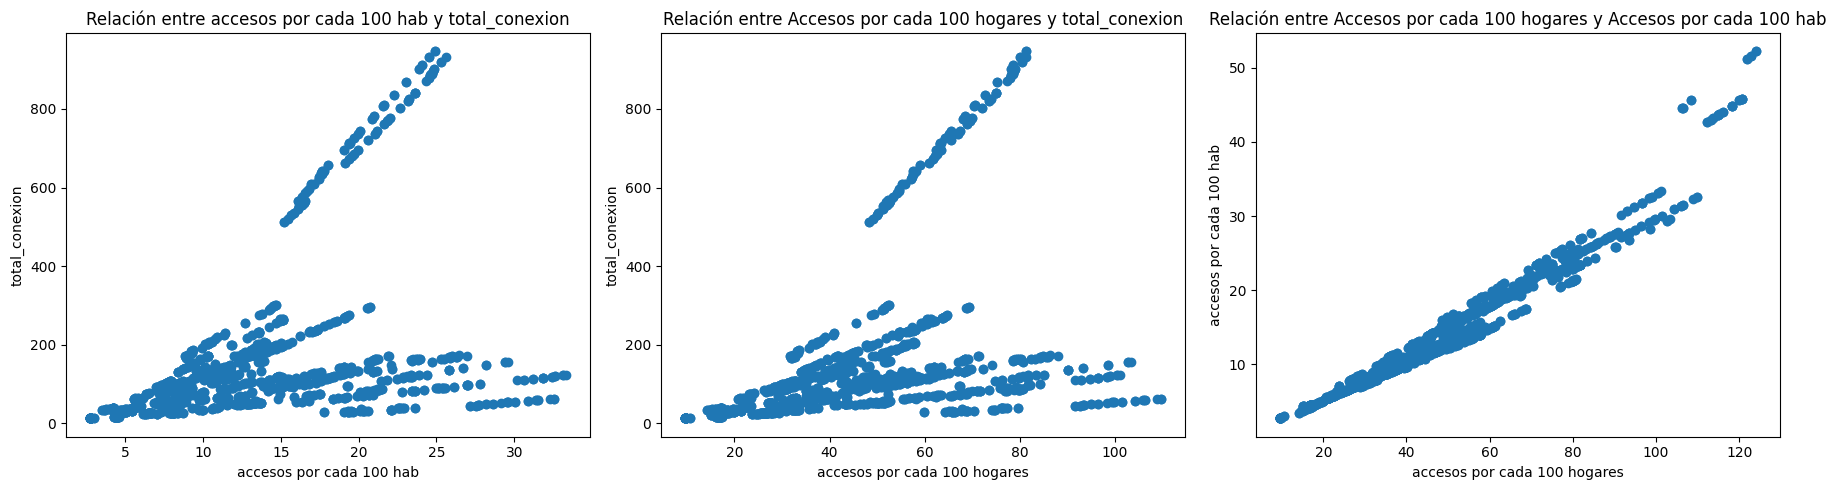

In [113]:
# De forma gráfica
# se crea una figura con tres subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Primer gráfico
axes[0].scatter(df_combinado['accesos por cada 100 hab'], df_combinado['total_conexion'])
axes[0].set_xlabel('accesos por cada 100 hab')
axes[0].set_ylabel('total_conexion')
axes[0].set_title('Relación entre accesos por cada 100 hab y total_conexion')

# Segundo gráfico
axes[1].scatter(df_combinado['accesos por cada 100 hogares'], df_combinado['total_conexion'])
axes[1].set_xlabel('accesos por cada 100 hogares')
axes[1].set_ylabel('total_conexion')
axes[1].set_title('Relación entre Accesos por cada 100 hogares y total_conexion')

# Tercer gráfico
axes[2].scatter(df_combinado['accesos por cada 100 hogares'], df_combinado['accesos por cada 100 hab'])
axes[2].set_xlabel('accesos por cada 100 hogares')
axes[2].set_ylabel('accesos por cada 100 hab')
axes[2].set_title('Relación entre Accesos por cada 100 hogares y Accesos por cada 100 hab')

# Ajustar los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

Habria una relación lineal entre los accesos por cada 100 hogares y los accesos por cada 100 habitantes.

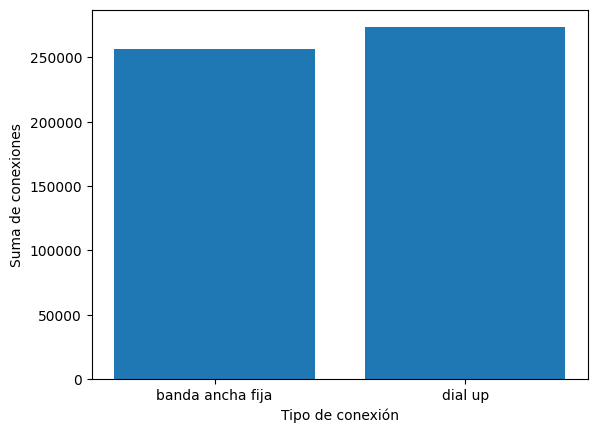

In [116]:
# Se calcula la suma de conexiones de "Banda ancha fija" y "Dial up"
suma_banda_ancha = df_combinado["banda ancha fija"].sum()
suma_dial_up = df_combinado["dial up"].sum()

# El grafico
plt.bar(["banda ancha fija", "dial up"], [suma_banda_ancha, suma_dial_up])
plt.xlabel("Tipo de conexión")
plt.ylabel("Suma de conexiones")
plt.show()


Hay mayor cantidad de conexiones de dial up

In [ ]:
# La correlación entre "banda ancha fija" y "dial up"
correlation = df_combinado["banda ancha fija"].corr(df_combinado["dial up"])
print("Correlación: ", correlation)

Correlación:  0.04672888326533101


Y parecen tener una correlación positiva entre sus valores

In [120]:
# Filtrar filas con valores no nulos en ambas columnas
df_filtered = df_combinado[['banda ancha fija', 'dial up']].dropna()

# Realizar la prueba t
t_stat, p_value = ttest_ind(df_filtered["banda ancha fija"], df_filtered["dial up"])

print("Estadístico t:", t_stat)
print("Valor p:", p_value)

Estadístico t: -1.3034349394430111
Valor p: 0.19251620680830409


Con base en estos resultados, no hay evidencia suficiente para rechazar la hipótesis nula de que las medias de banda ancha fijay dial upson iguales. 

In [124]:
# Se arma un subconjunto del DataFrame con las variables de interés
subset = df_combinado[['hasta 512 kbps', '+ 512 kbps - 1 mbps', '+ 1 mbps - 6 mbps', '+ 6 mbps - 10 mbps', '+ 10 mbps - 20 mbps', '+ 20 mbps - 30 mbps', '+ 30 mbps', 'otros Mbps']]

<Axes: >

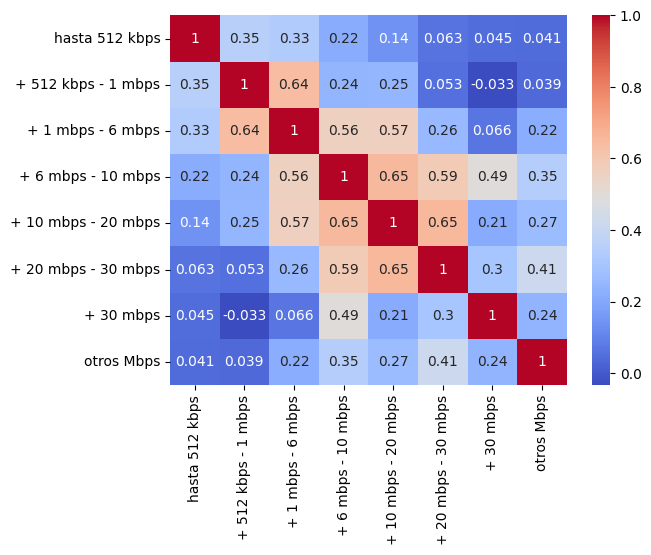

In [128]:
# Calcular la matriz de correlación
correlation_matrix = subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

Hay algunas velocidades que parecerían tener algún grado de correlación

Dataframe: "df_nacional"

El DataFrame "df_nacional" contiene información sobre las conexiones de Internet en diferentes provincias a lo largo de varios años y trimestres a nivel nacional.


In [129]:
# Carga del archivo:
df_nacional = pd.read_csv(r"df_nacional.csv")
df_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   año                           41 non-null     int64  
 1   trimestre                     41 non-null     int64  
 2   accesos por cada 100 hogares  41 non-null     object 
 3   accesos por cada 100 hab      41 non-null     object 
 4   mbps (media de bajada)        41 non-null     object 
 5   banda ancha fija              41 non-null     object 
 6   dial up                       41 non-null     float64
 7   hasta 512 kbps                41 non-null     float64
 8   entre 512 kbps y 1 mbps       41 non-null     float64
 9   entre 1 mbps y 6 mbps         41 non-null     float64
 10  entre 6 mbps y 10 mbps        41 non-null     float64
 11  entre 10 mbps y 20 mbps       41 non-null     float64
 12  entre 20 mbps y 30 mbps       41 non-null     float64
 13  más de 

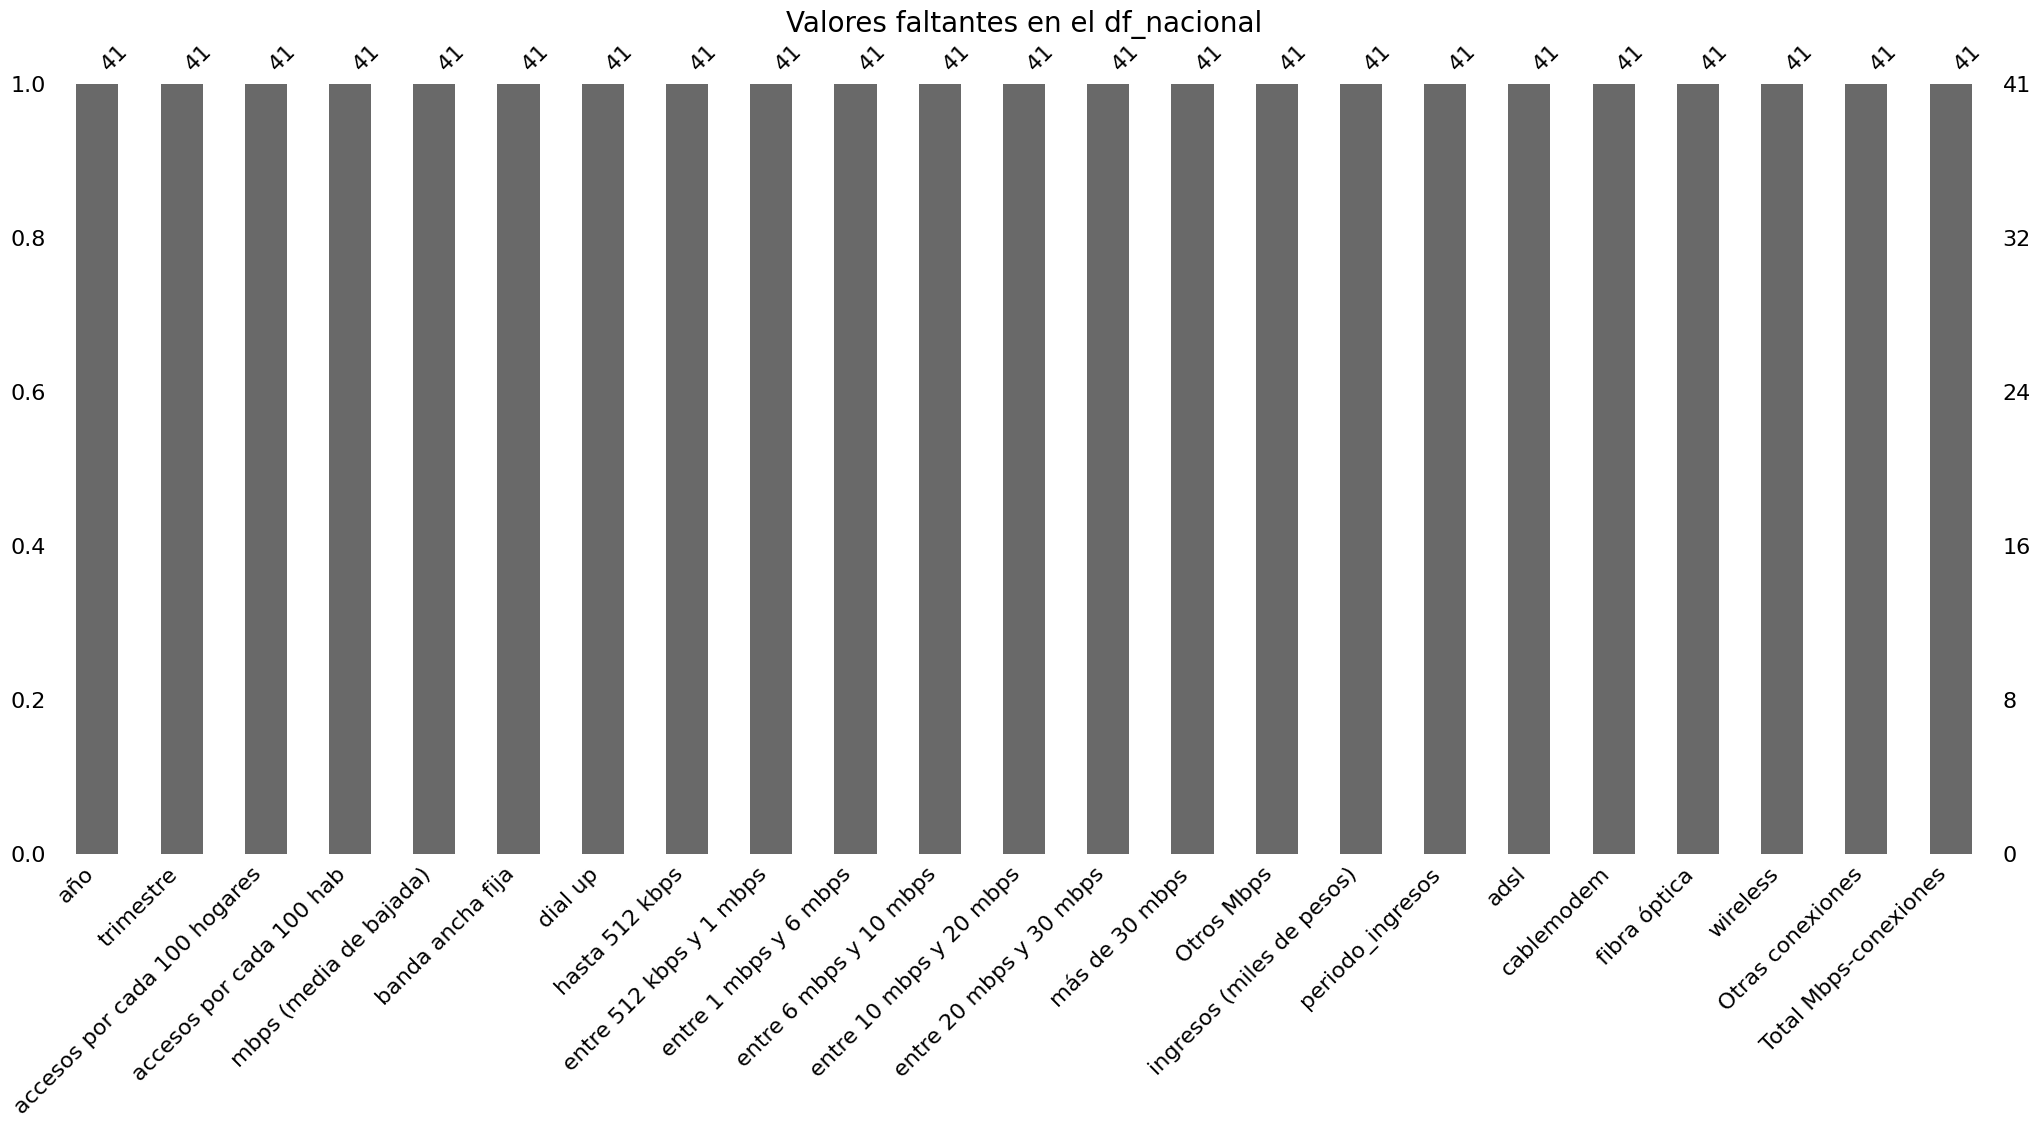

In [130]:
# Revisamos los valores faltantes del df
msno.bar(df_nacional)
plt.title('Valores faltantes en el df_nacional', fontsize=20) 
plt.show() # nuevamente vemos que no hay valores faltantes


In [131]:
# Si se ejecuta la correlacion para las variables numericas
df_numeric = df_nacional.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

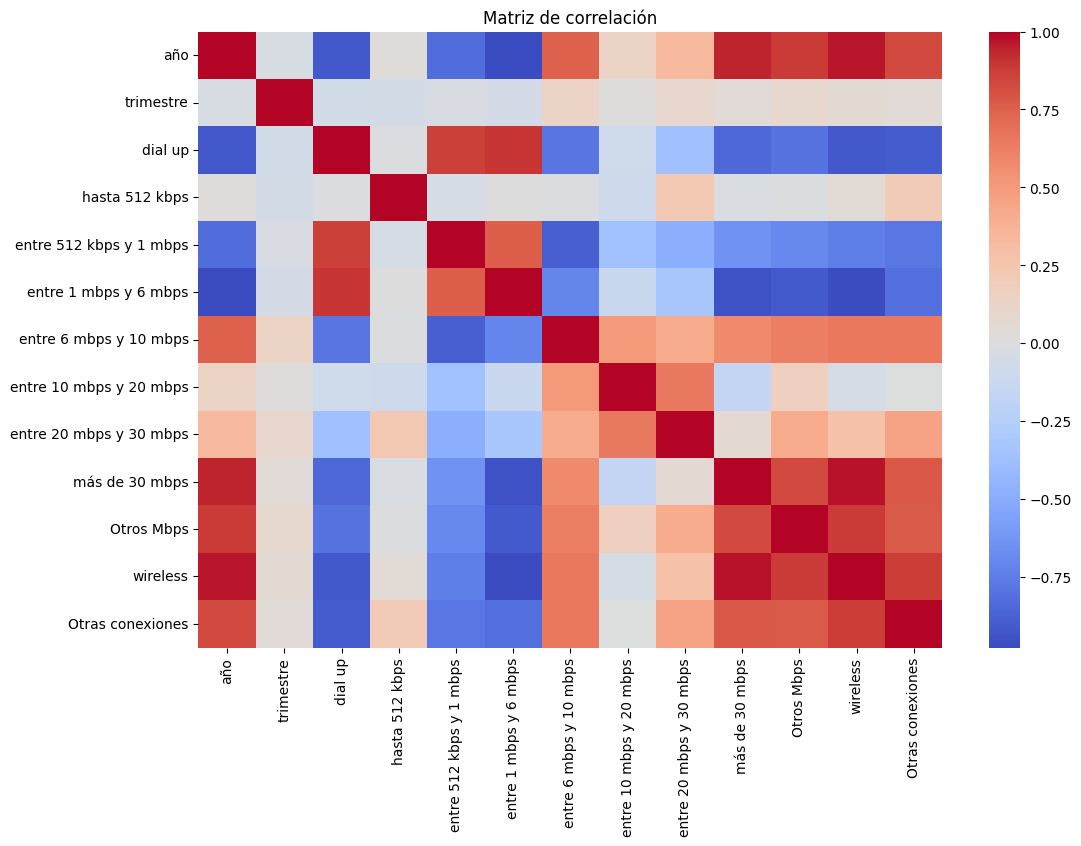

In [132]:
# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

se observa una zona de mayor correlacion

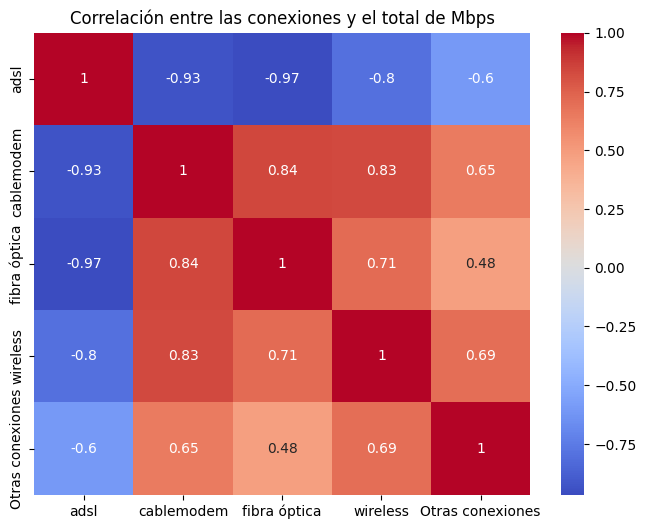

In [138]:
# Paso 1: Lista de columnas a procesar
conn_types = ['adsl', 'cablemodem', 'fibra óptica', 'wireless', 'Otras conexiones']

# Paso 2: Limpiar las columnas y convertirlas a numérico
for col in conn_types:
    df_nacional[col] = (
        df_nacional[col]
        .astype(str)                           # Asegurarse de que son cadenas
        .str.replace('.', '', regex=False)    # Eliminar separadores de miles
        .str.replace(',', '.', regex=False)   # Cambiar separadores decimales
        .str.strip()                          # Eliminar espacios adicionales
        .apply(pd.to_numeric, errors='coerce') # Convertir a float, NaN si falla
    )

# Gráfico de correlación de las conexiones con el total de Mbps
conn_types =  ['adsl', 'cablemodem', 'fibra óptica', 'wireless', 'Otras conexiones']
df_corr = df_nacional[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre las conexiones y el total de Mbps')
plt.show()


Las variables parecen tener un mayor nivel de correlación, exceptuando ADSL con todas las variables con las que presenta una clara correlacion negativa.


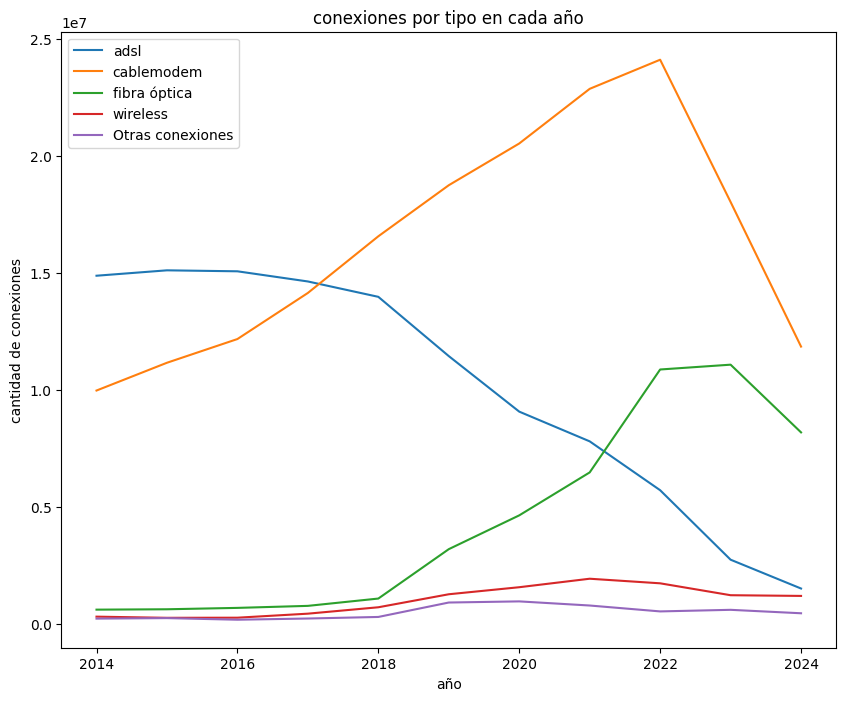

In [141]:
# Gráfico de líneas múltiples para comparar las conexiones por tipo en cada año
conn_types =  ['adsl', 'cablemodem', 'fibra óptica', 'wireless', 'Otras conexiones']
df_conn_types = df_nacional[conn_types].groupby(df_nacional['año']).sum()

plt.figure(figsize=(10, 8))
for conn_type in conn_types:
    plt.plot(df_conn_types.index, df_conn_types[conn_type], label=conn_type)

plt.title('conexiones por tipo en cada año')
plt.xlabel('año')
plt.ylabel('cantidad de conexiones')
plt.legend(loc='upper left')

Coincide con los valores obtenidos previamente a nivel de las provincias

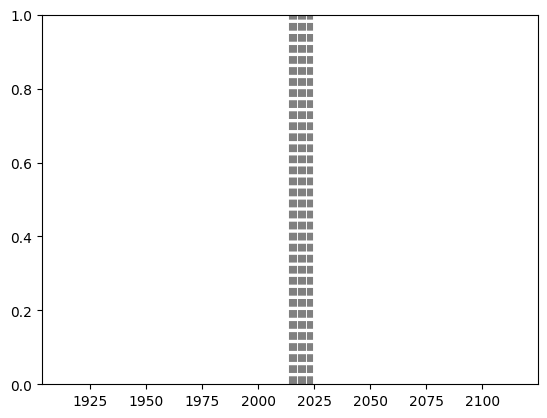

In [142]:
# Agregar líneas verticales de las etiquetas del eje x
for year in df_conn_types.index:
    plt.axvline(x=year, color='gray', linestyle='--')

plt.show()

Dataframe: "df_partidos"

El DataFrame "df_partidos" contiene información sobre las conexiones de Internet en diferentes provincias e incluso partidos y localidades a lo largo de varios años y trimestres a nivel nacional.

In [143]:
# Carga del archivo:
df_partidos = pd.read_csv(r"df_partidos.csv")
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         7753 non-null   object 
 1   Partido           7753 non-null   object 
 2   Localidad         7753 non-null   object 
 3   Tecnologia        7753 non-null   object 
 4   Link Indec        7753 non-null   object 
 5   Accesos_x         7747 non-null   object 
 6   Velocidad (Mbps)  0 non-null      float64
 7   Accesos_y         0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 484.7+ KB


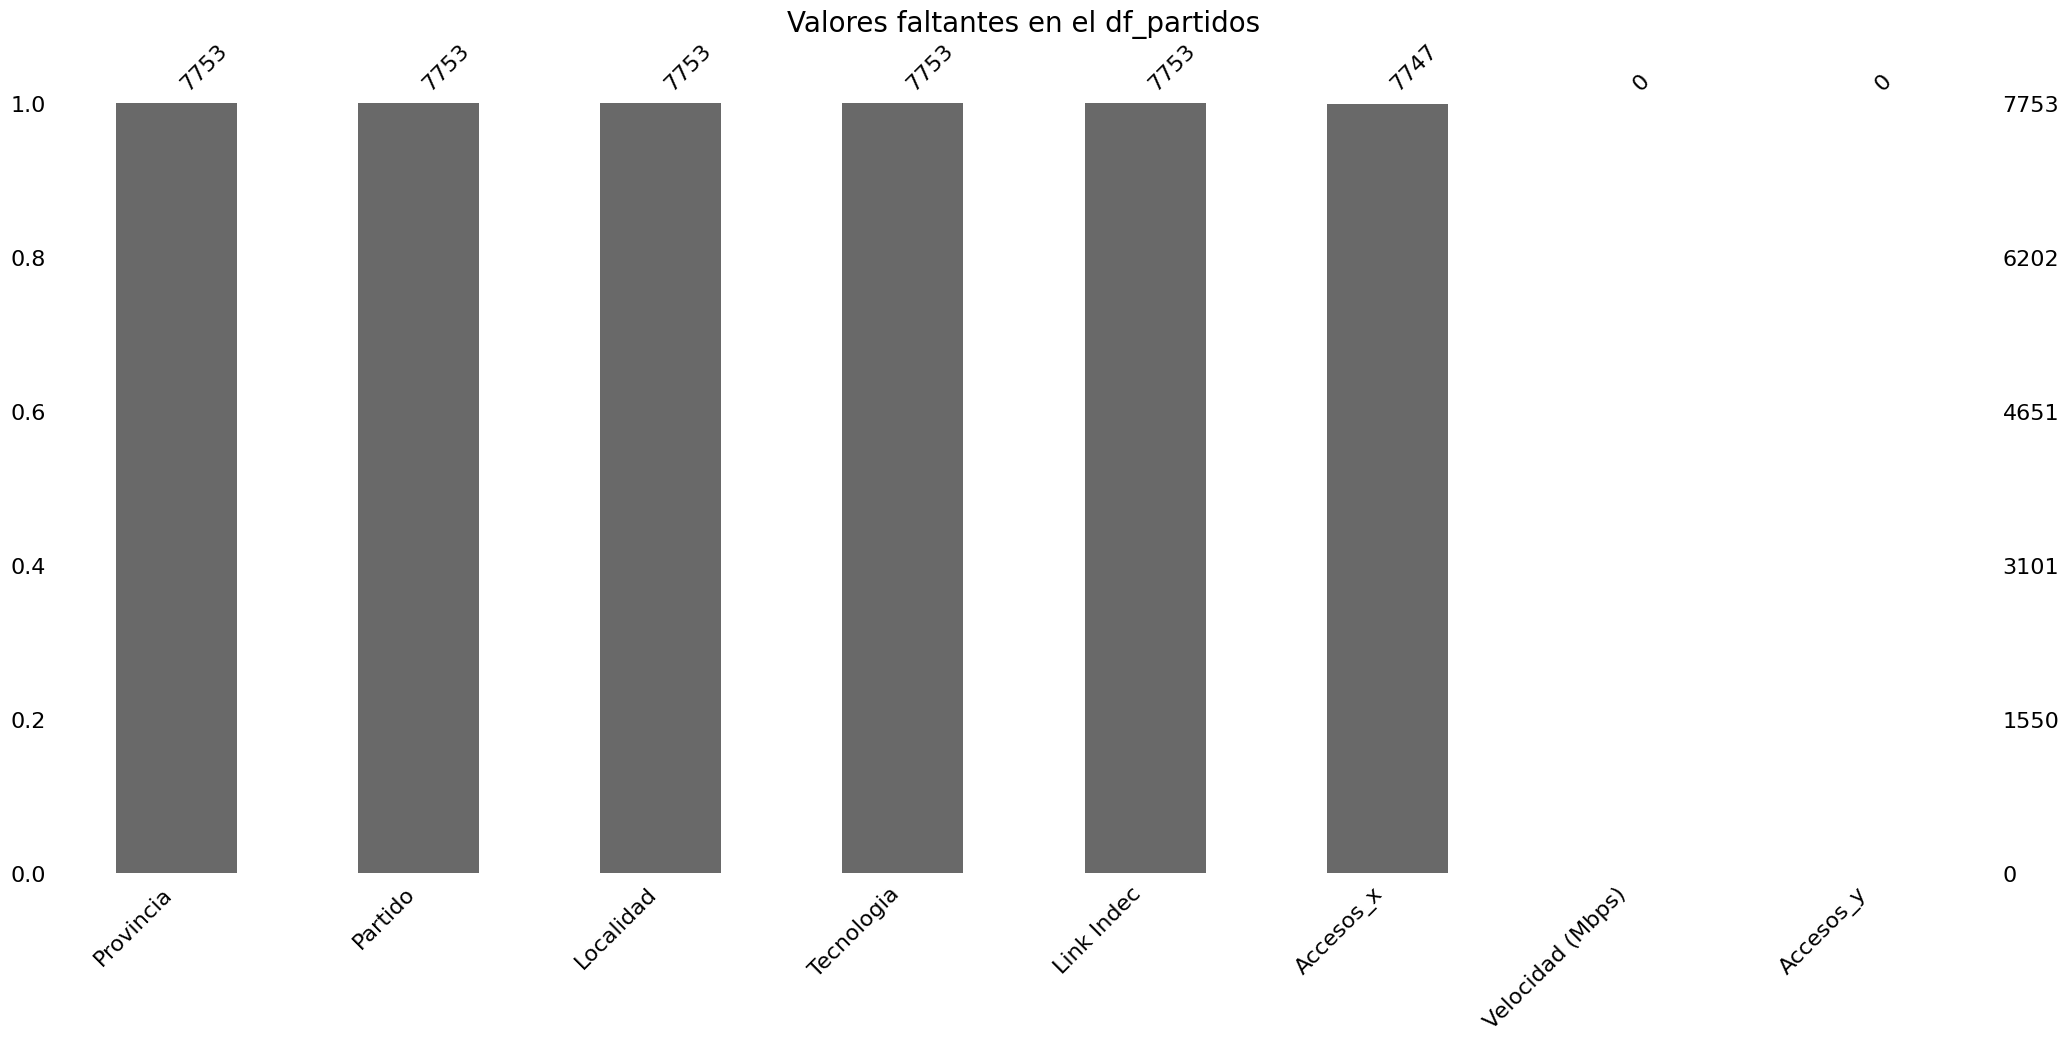

In [144]:
# Revisamos los valores faltantes del df
msno.bar(df_partidos)
plt.title('Valores faltantes en el df_partidos', fontsize=20) 
plt.show()  # no parece tener valores faltantes

In [151]:
# Lista de columnas para analizar
columnas = ['cableModem', 'dial Up', 'fibra Optica', 'Otras conexiones', 'satelital', 'wireless']
